In [17]:
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv

In [18]:
load_dotenv()
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")


## Simple AI Assitant

In [20]:
while True:
    question = input("Ask anything, Type quit and exit to end the chat")
    if question.lower().strip() in ["quit","exit"]:
        print("Byee, if you need any help just say hii...")
        break
    else:
        response = llm.invoke(question)
        print(response.content)

Byee, if you need any help just say hii...


# YouTube search tool

In [21]:
from langchain_community.tools import YouTubeSearchTool,YouTubeSearchTool
search = YouTubeSearchTool()

In [24]:
search.invoke("Tesla in india,5")

"['https://www.youtube.com/watch?v=D1SaQpb9tCI&pp=ygUOVGVzbGEgaW4gaW5kaWE%3D', 'https://www.youtube.com/watch?v=Ucvf2aAhhyQ&pp=ygUOVGVzbGEgaW4gaW5kaWE%3D', 'https://www.youtube.com/shorts/LvwN72LwaO0', 'https://www.youtube.com/shorts/mWXeNZOrBho', 'https://www.youtube.com/shorts/k3-JB-icl8M']"

In [1]:
from langgraph.graph import StateGraph, END, START
from typing import TypedDict

In [19]:
class Simple(TypedDict):

    question: str
    answer: str

In [20]:
load_dotenv()
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

In [25]:
def llm_qa(state:Simple)->Simple:
    output = llm.invoke(state["question"])
    state["answer"] = output.content
    return state 

In [35]:
def uppper_case(state:Simple)->Simple:

    u_case = state["answer"].upper()
    state["answer"] = u_case
    return state

In [36]:
graph = StateGraph(Simple)

graph.add_node("llm_qa",llm_qa)
graph.add_node("u_case",uppper_case)

graph.add_edge(START,"llm_qa")
graph.add_edge("llm_qa","u_case")
graph.add_edge("u_case",END)

workflow = graph.compile()

In [37]:
initial_state = {"question":"what is the Capital of india?"}
final_state = workflow.invoke(initial_state)

In [38]:
final_state

{'question': 'what is the Capital of india?',
 'answer': 'THE CAPITAL OF INDIA IS **NEW DELHI**.'}

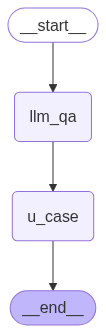

In [39]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [40]:
for output in workflow.stream(initial_state):
    for k,v in output.items():
        print(f"this is from {k}")
        print("______________________")
        print(f"this is from {v}")
        print(f"_____________________")



this is from llm_qa
______________________
this is from {'question': 'what is the Capital of india?', 'answer': 'The capital of India is **New Delhi**.'}
_____________________
this is from u_case
______________________
this is from {'question': 'what is the Capital of india?', 'answer': 'THE CAPITAL OF INDIA IS **NEW DELHI**.'}
_____________________
